# Providing Datasets

In [ ]:
!wget "https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/training.tif"
!wget "https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/training_groundtruth.tif"
!wget "https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/testing.tif"
!wget "https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/testing_groundtruth.tif"

In [ ]:
from  IPython.display import clear_output
!apt-get install axel
clear_output()
!axel -n 128 https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/volumedata.tif
clear_output()

In [ ]:
from  IPython.display import clear_output
!apt-get install axel
clear_output()
!axel -n 128 https://documents.epfl.ch/groups/c/cv/cvlab-unit/www/data/%20ElectronMicroscopy_Hippocampus/results_test.tif
clear_output()

In [ ]:
pip install patchify

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import cv2
import tifffile as tiff
from glob import glob

from tensorflow.keras.utils import normalize
import os
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

In [ ]:
large_image_stack = tiff.imread('/content/training.tif')
large_mask_stack = tiff.imread('/content/training_groundtruth.tif')

large_image_stack_test = tiff.imread('/content/testing.tif')
large_mask_stack_test = tiff.imread('/content/testing_groundtruth.tif')

# larg_img = tiff.imread('/content/volumedata.tif')
# larg_img_test = tiff.imread('/content/results_test.tif')

In [ ]:
print('large_img_stack :' , large_image_stack.shape)
print('large_mask_stack :' , large_mask_stack.shape)

print('large_img_stack_test :' , large_image_stack_test.shape)
print('large_mask_stack_test :' , large_mask_stack_test.shape)

# print('larg_img :' , larg_img.shape)
# print('larg_img_test :' , larg_img_test.shape)

large_img_stack : (165, 768, 1024)
large_mask_stack : (165, 768, 1024)
large_img_stack_test : (165, 768, 1024)
large_mask_stack_test : (165, 768, 1024)


In [ ]:
image_directory = '/content/patches/images'
masks_directory = '/content/patches/masks'

os.makedirs(image_directory, exist_ok = True)
os.makedirs(masks_directory, exist_ok = True)

In [ ]:
for img in range(large_image_stack.shape[0]):

    large_image = large_image_stack[img]
    
    patches_img = patchify(large_image, (256, 256), step=256)  #Step=256 for 256 patches means no overlap
    
    for i in range(patches_img.shape[0]):
        for j in range(patches_img.shape[1]):
            
            single_patch_img = patches_img[i,j,:,:]
            tiff.imwrite('patches/images/' + 'image_' + str(img) + '_' + str(i)+str(j)+ ".tif", single_patch_img)

In [ ]:
for msk in range(large_mask_stack.shape[0]):
     
    large_mask = large_mask_stack[msk]
    
    patches_mask = patchify(large_mask, (256, 256), step=256)  #Step=256 for 256 patches means no overlap
    

    for i in range(patches_mask.shape[0]):
        for j in range(patches_mask.shape[1]):
            
            single_patch_mask = patches_mask[i,j,:,:]
            tiff.imwrite('patches/masks/' + 'mask_' + str(msk) + '_' + str(i)+str(j)+ ".tif", single_patch_mask)
            single_patch_mask = single_patch_mask / 255.

# Using Preprocessed Dataset

In [ ]:
image_directory = '/content/drive/MyDrive/Data/patches/images'
masks_directory = '/content/drive/MyDrive/Data/patches/masks'

In [ ]:
#Resizing images, if needed
SIZE_X = 128 
SIZE_Y = 128
n_classes=4 #Number of classes for segmentation
num_images = 1000  #Total 1600 available

In [ ]:
image_names = glob("/content/drive/MyDrive/Data/patches/images/*.tif")
print(image_names[:5])

['/content/drive/MyDrive/Data/patches/images/image_161_02.tif', '/content/drive/MyDrive/Data/patches/images/image_132_03.tif', '/content/drive/MyDrive/Data/patches/images/image_83_12.tif', '/content/drive/MyDrive/Data/patches/images/image_67_22.tif', '/content/drive/MyDrive/Data/patches/images/image_113_20.tif']


In [ ]:
image_names.sort()
print(image_names)

['/content/drive/MyDrive/Data/patches/images/image_0_00.tif', '/content/drive/MyDrive/Data/patches/images/image_0_01.tif', '/content/drive/MyDrive/Data/patches/images/image_0_02.tif', '/content/drive/MyDrive/Data/patches/images/image_0_03.tif', '/content/drive/MyDrive/Data/patches/images/image_0_10.tif', '/content/drive/MyDrive/Data/patches/images/image_0_11.tif', '/content/drive/MyDrive/Data/patches/images/image_0_12.tif', '/content/drive/MyDrive/Data/patches/images/image_0_13.tif', '/content/drive/MyDrive/Data/patches/images/image_0_20.tif', '/content/drive/MyDrive/Data/patches/images/image_0_21.tif', '/content/drive/MyDrive/Data/patches/images/image_0_22.tif', '/content/drive/MyDrive/Data/patches/images/image_0_23.tif', '/content/drive/MyDrive/Data/patches/images/image_100_00.tif', '/content/drive/MyDrive/Data/patches/images/image_100_01.tif', '/content/drive/MyDrive/Data/patches/images/image_100_02.tif', '/content/drive/MyDrive/Data/patches/images/image_100_03.tif', '/content/drive

In [ ]:
image_names_subset = image_names[0:num_images]

In [ ]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [ ]:
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)

In [ ]:
mask_names = glob("/content/drive/MyDrive/Data/patches/masks/*.tif")
mask_names.sort()

mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (1000, 256, 256, 1)
Mask data shape is:  (1000, 256, 256, 1)
Max pixel value in image is:  244
Labels in the mask are :  [  0 255]


In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)

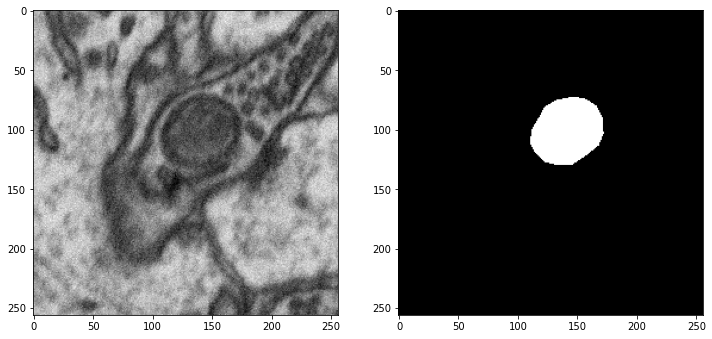

In [ ]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate
from matplotlib import pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

In [ ]:
def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

In [ ]:
def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [ ]:
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 256, 256, 64  640         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_54 (BatchN  (None, 256, 256, 64  256        ['conv2d_57[0][0]']              
 ormalization)                  )                                                             

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=25, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/25
50/50 [==============================] - 116s 2s/step - loss: 0.1597 - accuracy: 0.9544 - val_loss: 133.2604 - val_accuracy: 0.0598
Epoch 2/25
50/50 [==============================] - 85s 2s/step - loss: 0.0628 - accuracy: 0.9818 - val_loss: 0.7907 - val_accuracy: 0.6216
Epoch 3/25
50/50 [==============================] - 85s 2s/step - loss: 0.0455 - accuracy: 0.9864 - val_loss: 0.2433 - val_accuracy: 0.9330
Epoch 4/25
50/50 [==============================] - 86s 2s/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 1.4196 - val_accuracy: 0.6998
Epoch 5/25
50/50 [==============================] - 86s 2s/step - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.9887 - val_accuracy: 0.6485
Epoch 6/25
50/50 [==============================] - 86s 2s/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 1.6066 - val_accuracy: 0.6541
Epoch 7/25
50/50 [==============================] - 86s 2s/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.2699 - val_accuracy: 0.9214
Epoch 8/25
50/50 

In [ ]:
#Save the model for future use
best_model_saves = '/content/drive/MyDrive/best models/binary_semantic_segmentation/'
os.makedirs(best_model_saves, exist_ok = True)
model.save('/content/drive/MyDrive/best models/binary_semantic_segmentation/semantic_segmentation_25epochs.hdf5')

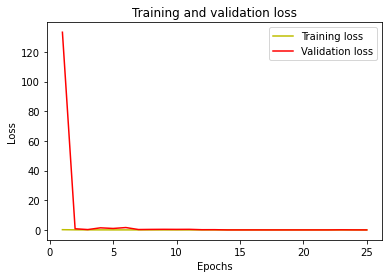

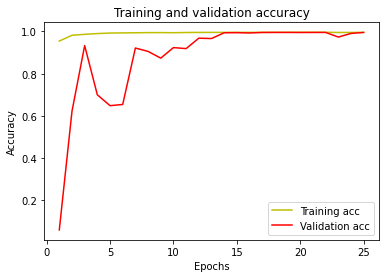

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(0.5, 1.0, 'َActuall Label')

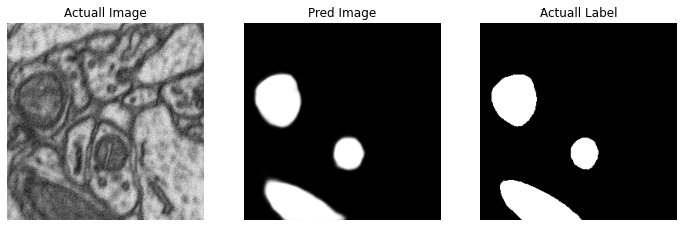

In [ ]:
image_number = random.randint(0, len(X_test)-1)
img = X_test[image_number]
img = np.expand_dims(img, axis = 0)
pred = model.predict(img)

fig, ax = plt.subplots(nrows = 1, ncols = 3 , figsize = (12 , 16))
ax[0].imshow(img[0,:,:,0], cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('Actuall Image')

ax[1].imshow(pred[0,:,:,0], cmap = 'gray')
ax[1].axis('off')
ax[1].set_title('Pred Image')

ax[2].imshow(y_test[image_number][:,:,0], cmap = 'gray')
ax[2].axis('off')
ax[2].set_title('َActuall Label')

